# Пятое задание

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import patches

In [55]:
def cdf_inverse(Fx, theta=10):
    if not isinstance(Fx, np.ndarray):
        raise ValueError("Fx должен быть массивом numpy.")
    if not (0 <= Fx).all() or not (Fx <= 1).all():
        raise ValueError("Все значения Fx должны быть в диапазоне [0, 1].")
    
    return ((Fx + 1) * theta).astype(float)

def generate_sample(n=100, theta=10, random_state=None):
    if n <= 0:
        raise ValueError("n должно быть положительным целым числом.")
    
    if random_state is not None:
        np.random.seed(random_state)
    
    Fx = np.random.sample(n)
    return cdf_inverse(Fx, theta)

# Генерация выборки и вывод результата
sample = generate_sample()
print('sample =', sample)

all_intervals = []

sample = [17.03456014 17.80016909 16.29145825 15.86459861 14.85355876 10.63905171
 11.76804927 12.53251139 13.32486145 15.93013523 16.67116966 10.9451082
 14.6400614  19.24553698 15.19606415 17.40084703 12.86196647 11.58818637
 12.55842037 10.55788053 10.7264294  17.17240619 10.09933004 16.42552384
 19.85373828 14.13047991 19.99484978 10.6595113  19.56030028 17.63203033
 10.32938827 18.11565751 17.63375136 19.28036192 15.6664431  13.44074678
 18.42477847 13.82647815 11.53708123 17.38359982 17.31807997 10.74596642
 10.35221878 10.59004434 11.91703489 12.70415936 10.06118639 19.28214485
 19.22417972 11.62569514 14.54775967 18.3138386  13.56354154 15.13578132
 14.58815807 15.45196485 15.65783702 18.99704916 17.93681538 11.9041816
 17.88918681 17.04881929 13.16016147 14.00339356 15.4250161  14.77406997
 18.16616334 10.3977183  13.69360166 13.92500584 18.19421153 12.96675422
 11.55974441 10.92445347 12.30038591 12.18474396 16.64867629 12.58765628
 10.36674977 13.38015015 11.66504375 16.1379

## Доверительные интервалы

### Стандартный доверительный интервал

In [56]:
def exact_confidence_interval(sample, beta=0.95, precision=3):
    if not isinstance(sample, np.ndarray):
        raise ValueError("sample должен быть массивом numpy.")
    if len(sample) == 0:
        raise ValueError("Выборка не должна быть пустой.")
    
    n = np.size(sample)
    x_max = np.max(sample)
    
    t1 = x_max / (np.clip(((1 + beta) / 2) ** (1 / n) + 1, a_min=1e-10, a_max=None))
    t2 = x_max / (np.clip(((1 - beta) / 2) ** (1 / n) + 1, a_min=1e-10, a_max=None))
    
    return round(t1, precision), round(t2, precision)

t1, t2 = exact_confidence_interval(sample)
print(f'Exact Confidence Interval = ({t1}, {t2})')

all_intervals.append((t1, t2))


Exact Confidence Interval = (9.999, 10.182)


### Ассимптотический доверительный интервал

In [57]:
def calc_quantiles(beta):
    erfinv = sp.special.erfinv
    u1 = np.sqrt(2) * erfinv(-beta)
    u2 = -u1
    return u1, u2

def asymptotic_confidence_interval(sample, beta=0.05, precision=3):
    if not isinstance(sample, np.ndarray):
        raise ValueError("sample должен быть массивом numpy.")
    if len(sample) == 0:
        raise ValueError("Выборка не должна быть пустой.")
    
    n = np.size(sample)
    mean = np.mean(sample)
    square_mean = np.dot(sample, sample) / n
    
    u1, u2 = calc_quantiles(beta)
    
    variance = square_mean - mean**2
    if variance < 0:
        raise ValueError("Вариация не может быть отрицательной.")
    
    std_error = np.sqrt(variance / n)
    
    t1 = (3/2 * u1 * std_error) + (2/3 * mean)
    t2 = (3/2 * u2 * std_error) + (2/3 * mean)
    
    return round(t1, precision), round(t2, precision)

t1, t2 = asymptotic_confidence_interval(sample)
print(f'Asymptotic Confidence Interval = ({t1}, {t2})')

all_intervals.append((t1, t2))

Asymptotic Confidence Interval = (9.802, 9.859)


Непараметрический бутстрап

In [58]:
#OMM
def est_1(sample):
    mean = np.mean(sample)
    return 2/3 * mean

#OMP
def est_2(sample):    
    n = np.size(sample)
    x_max = np.max(sample)
    return (n+1)/(2*n+1) * x_max

n_est = np.array([est_1, est_2])
n_est_formula = [r'\frac{2}{3}\overline{x}', r'\frac{n+1}{2n+1}x_{max}']


print(f'Estimates: {"; ".join([f"est_{i+1}={round(est(sample), 3)}" for i, est in enumerate(n_est)])}')
def bootstrap_confidence_interval(sample, estimation, beta=0.95, BOOTSTRAP_RANGE=1000, precision=3):
    theta_est = estimation(sample)
    deltas = []
    for i in range(BOOTSTRAP_RANGE):
        sample_i = np.random.choice(sample, size=np.size(sample))
        deltas.append(estimation(sample_i) - theta_est)
    k1 = int((1-beta)/2 * BOOTSTRAP_RANGE) - 1
    k2 = int((1+beta)/2 * BOOTSTRAP_RANGE) - 1
    deltas = np.sort(deltas)
    t1 = -deltas[k2] + theta_est
    t2 = -deltas[k1] + theta_est
    return round(t1, precision), round(t2, precision)


intervals = [bootstrap_confidence_interval(sample, est_i) for est_i in n_est]
print('Bootstrap Confidence Intervals:', '; '.join([f'est_{i+1}=({interv[0]}, {interv[1]})' for i, interv in enumerate(intervals)]), end=';\n')

all_intervals.extend(intervals)

Estimates: est_1=9.83; est_2=10.047
Bootstrap Confidence Intervals: est_1=(9.456, 10.24); est_2=(10.047, 10.224);


## Сравнение

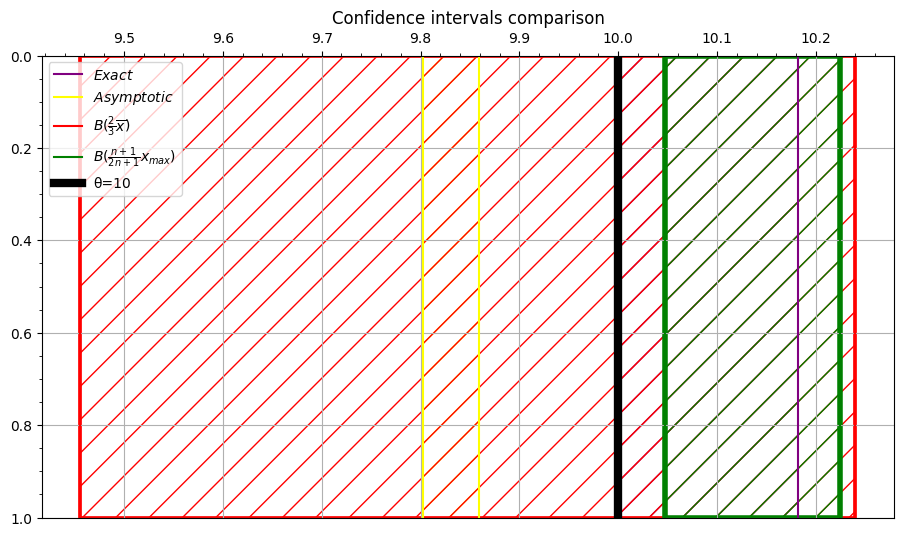

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))

y_min, y_max = 0, 1

plt.title('Confidence intervals comparison')
plt.ylim(y_min, y_max)
ax.minorticks_on()
ax.grid(which='major')

# цвета
colors = ['purple', 'yellow', 'red', 'green', 'blue', 'orange', 'lime', 'cyan']

labels = ['Exact', 'Asymptotic'] + [f'B({formula})' for formula in n_est_formula] + [f'BWP({formula})' for formula in n_est_formula]
labels += [f'θ={10}']
min_width, max_width = 0, 4
linewidths = np.linspace(min_width, max_width, len(all_intervals))

# Интервалы по оси y
y = [y_min, y_max]

# Интервалы по оси x верхние + отрисовка
for i, interv in enumerate(all_intervals):
    xi1=[interv[0], interv[0]]
    xi2=[interv[1], interv[1]]
    ax.plot(xi1, y, color=colors[i], label=fr'${labels[i]}$')
    ax.plot(xi2, y, color=colors[i])
    patch = patches.Rectangle((xi1[0], y[0]), xi2[0]-xi1[0], y[1], linewidth=linewidths[i], fill=None, hatch='/', color=colors[i])
    ax.add_patch(patch)

ax.plot((10, 10), y, color='black', label=labels[-1], linewidth=max_width*1.5)

plt.gca().invert_yaxis()
plt.gca().axes.xaxis.set_ticks_position("top")
plt.legend()

fig1 = plt.gcf()
plt.show()

fig1.savefig('Task_4', dpi=120)

# Шестое задание

In [69]:
N = 100
THETA = 5
BETA = 0.95
def cdf_inverse(Fx, theta=1.0):
    if theta <= 1:
        raise ValueError("Параметр theta должен быть больше 1.")
    if np.any(Fx < 0) or np.any(Fx > 1):
        raise ValueError("Значения Fx должны быть в диапазоне [0, 1].")
    
    return ((-Fx + 1) ** (-1 / (theta - 1))).astype(float)

def generate_sample(n=100, theta=1.0, random_state=None):
    if n <= 0:
        raise ValueError("n должно быть положительным целым числом.")
    if theta <= 0:
        raise ValueError("Параметр theta должен быть положительным.")

    if random_state is not None:
        np.random.seed(random_state)
    
    Fx = np.random.sample(n)
    return cdf_inverse(Fx, theta)

sample = generate_sample(n=100, theta=2, random_state=42)
print('sample =', sample)


all_intervals = []

sample = [ 1.59882357 20.28986359  3.73125894  2.49164355  1.18486029  1.18482643
  1.06166536  7.47250934  2.5069883   3.42550896  1.02101712 33.23346915
  5.96810552  1.26958189  1.22223236  1.22459653  1.43728186  2.10418418
  1.76039298  1.41089322  2.5763428   1.16210676  1.41271801  1.57818779
  1.83847181  4.65497254  1.24949049  2.05860621  2.45347337  1.04871316
  2.54806187  1.20558057  1.06957774 19.56393448 29.09686227  5.21913444
  1.43804976  1.10824459  3.16689231  1.78620069  1.13900176  1.98089196
  1.03561321 11.02783893  1.34912708  2.96315861  1.45287824  2.08362861
  2.20609459  1.22677478 32.87811151  4.44706967 16.52863645  9.50817541
  2.48694342 12.79987467  1.09708368  1.24375458  1.04736969  1.48220684
  1.63579724  1.37239919  5.83899017  1.55461356  1.39069391  2.18672958
  1.16404167  5.05553456  1.08055616 76.2598311   4.39067852  1.24799647
  1.00555278  5.41892132  3.41130838  3.69013451  4.37197357  1.07996568
  1.55876318  1.13105418  7.3047847   2.65

In [73]:
def calc_quantiles(beta):
    erfinv = sp.special.erfinv
    u1 = np.sqrt(2) * erfinv(-beta)
    u2 = -u1
    return u1, u2

def median_asymptotic_confidence_interval(sample, beta=0.05, precision=3):
    if not isinstance(sample, np.ndarray):
        raise ValueError("sample должен быть массивом numpy.")
    if len(sample) == 0:
        raise ValueError("Выборка не должна быть пустой.")
    
    n = np.size(sample)
    theta_est = n / np.sum(np.log(sample)) + 1
    u1, u2 = calc_quantiles(beta)
    
    term = 2 ** (1 / (theta_est - 1)) * np.log(2) / ((theta_est - 1) * np.sqrt(n))
    t1 = (u1 * term) + 2 ** (1 / (theta_est - 1))
    t2 = (u2 * term) + 2 ** (1 / (theta_est - 1))
    
    return round(t1, precision), round(t2, precision)


t1, t2 = median_asymptotic_confidence_interval(sample)
print(f'Asymptotic Confidence Interval for median = ({t1}, {t2})')
print(f'Real median = {round(np.median(sample), 3)}')


Asymptotic Confidence Interval for median = (1.878, 1.893)
Real median = 1.867


In [74]:
def calc_quantiles(beta):
    erfinv = sp.special.erfinv
    u1 = 2**0.5 * erfinv(-beta)
    u2 = -u1
    return u1, u2

def asymptotic_confidence_interval_omm(sample, beta=BETA, precision=3):
    n = np.size(sample)
    a1 = np.mean(sample) # среднее элементов выборки
    a2 = np.dot(sample, sample) / n  # среднее квадратов элементов выборки
    u1, u2 = calc_quantiles(beta)
    t1 = (u1 * (a2-a1**2)**0.5 / ((a1-1)**2 * n**0.5)) + 2 + 1/(a1-1)
    t2 = (u2 * (a2-a1**2)**0.5 / ((a1-1)**2 * n**0.5)) + 2 + 1/(a1-1)
    return round(t1, precision), round(t2, precision)


# cannot be used
def asymptotic_confidence_interval_omp(sample, beta=BETA, precision=3):
    n = np.size(sample)
    theta_est = n / np.sum(np.log(sample)) + 1
    u1, u2 = calc_quantiles(beta)
    t1 = u1 * (theta_est-1)/(n**0.5) + theta_est
    t2 = u2 * (theta_est-1)/(n**0.5) + theta_est
    return round(t1, precision), round(t2, precision)


t1_omm, t2_omm = asymptotic_confidence_interval_omm(sample)
print(f'Asymptotic Confidence Interval[OMM] = ({t1_omm}, {t2_omm})')
t1_omp, t2_omp = asymptotic_confidence_interval_omp(sample)
print(f'Asymptotic Confidence Interval[OMP] = ({t1_omp}, {t2_omp}) CANNOT BE USED!!!')

all_intervals.extend([(t1_omm, t2_omm), (t1_omp, t2_omp)])

Asymptotic Confidence Interval[OMM] = (2.136, 2.401)
Asymptotic Confidence Interval[OMP] = (1.879, 2.307) CANNOT BE USED!!!


In [ ]:
# OMP
def est_1(sample):
    n = np.size(sample)
    return 1 + n/(np.sum(np.log(sample)))     


# OMM
def est_2(sample):
    return 2 + 1/(np.mean(sample) - 1)

n_est = np.array([est_1, est_2])
n_est_formula = [r'\frac{1}{\sum_{i=1}^{n}ln(x_i)}+1', r'\frac{1}{\overline{x}-1}+2']

print(f'Estimates: {"; ".join([f"est_{i+1}={round(est(sample), 3)}" for i, est in enumerate(n_est)])}')


Estimates: est_1=2.093; est_2=2.268
Bootstrap Confidence Intervals: est_1=(1.844, 2.27); est_2=(2.079, 2.362);


In [80]:
def bootstrap_confidence_interval(sample, estimation, beta=BETA, BOOTSTRAP_RANGE=1000, precision=3):
    theta_est = estimation(sample)
    deltas = []
    for i in range(BOOTSTRAP_RANGE):
        sample_i = np.random.choice(sample, size=np.size(sample))
        deltas.append(estimation(sample_i) - theta_est)
    k1 = int((1-beta)/2 * BOOTSTRAP_RANGE) - 1
    k2 = int((1+beta)/2 * BOOTSTRAP_RANGE) - 1
    deltas = np.sort(deltas)
    t1 = -deltas[k2] + theta_est
    t2 = -deltas[k1] + theta_est
    return round(t1, precision), round(t2, precision)


intervals = [bootstrap_confidence_interval(sample, est_i) for est_i in n_est]
print('Bootstrap Confidence Intervals:', '; '.join([f'est_{i+1}=({interv[0]}, {interv[1]})' for i, interv in enumerate(intervals)]), end=';\n')

all_intervals.extend(intervals)

Bootstrap Confidence Intervals: est_1=(1.832, 2.287); est_2=(2.071, 2.367);


In [81]:
def bootstrap_with_parameter_confidence_interval(sample, estimation, beta=BETA, BOOTSTRAP_RANGE=10_000, precision=3):
    theta_est = estimation(sample)
    thetas = []
    for i in range(BOOTSTRAP_RANGE):
        sample_i = generate_sample(theta=theta_est)
        thetas.append(estimation(sample_i))
    thetas = np.sort(thetas)
    k1 = int((1-beta)/2 * BOOTSTRAP_RANGE) - 1
    k2 = int((1+beta)/2 * BOOTSTRAP_RANGE) - 1
    t1 = thetas[k1]
    t2 = thetas[k2]
    return round(t1, precision), round(t2, precision)
    
    
intervals = [bootstrap_with_parameter_confidence_interval(sample, est_i, BOOTSTRAP_RANGE=50_000) for est_i in n_est]
print('Bootstrap with parameter Confidence Intervals:', '; '.join([f'est_{i+1}=({interv[0]}, {interv[1]})' for i, interv in enumerate(intervals)]), end=';\n')

all_intervals.extend(intervals)

Bootstrap with parameter Confidence Intervals: est_1=(1.905, 2.345); est_2=(2.1, 2.691);


IndexError: list index out of range

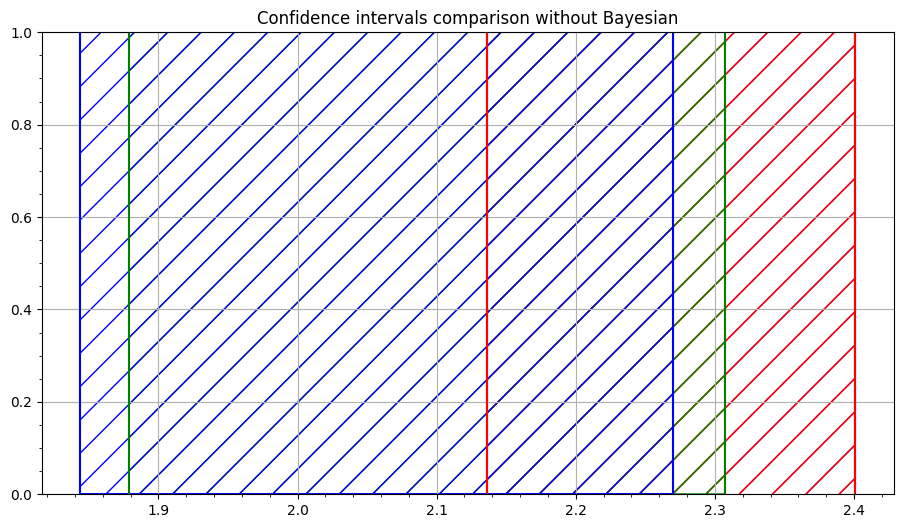

In [84]:
fig, ax = plt.subplots(figsize=(11, 6))

y_min, y_max = 0, 1

plt.title('Confidence intervals comparison without Bayesian')
plt.ylim(y_min, y_max)
ax.minorticks_on()
ax.grid(which='major')

# цвета
colors = ['purple', 'yellow', 'red', 'green', 'blue', 'orange', 'lime', 'cyan', 'fuchsia']
labels = ['Asymptotic[OMM]', 'Asymptotic[OMP]'] +\
         [f'B({formula})' for formula in n_est_formula]
labels += [f'θ={THETA}']
min_width, max_width = 0, 4
linewidths = np.linspace(min_width, max_width, len(all_intervals)-1)

# Интервалы по оси y
y = [y_min, y_max]

# Интервалы по оси x верхние + отрисовка
for i, interv in enumerate(all_intervals[1:]):
    xi1=[interv[0], interv[0]]
    xi2=[interv[1], interv[1]]
    ax.plot(xi1, y, color=colors[i], label=fr'${labels[i]}$')
    ax.plot(xi2, y, color=colors[i])
    patch = patches.Rectangle((xi1[0], y[0]), xi2[0]-xi1[0], y[1], linewidth=linewidths[i], fill=None, hatch='/', color=colors[i])
    # первый аргумент - координаты левого нижнего угла штриховки. второй и третий-
    # ширина и высота соответственно.
    ax.add_patch(patch)

# Добавим реальное значение параметра
ax.plot((THETA, THETA), y, color='black', label=labels[-1], linewidth=max_width*1.5)

plt.gca().invert_yaxis()
plt.gca().axes.xaxis.set_ticks_position("top")
plt.legend()

fig1 = plt.gcf()
plt.show()

fig1.savefig('Task_5_01', dpi=120)